In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mplt
import os
import pandas as pd
from google.colab import files

In [ ]:
import tensorflow as tf

In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: franckdzoupet
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:03<00:00, 74.3MB/s]


We print the images

In [ ]:
import cv2
import os

# Specify the path to the dataset directory
dataset_cats = '/content/cat-and-dog/training_set/training_set/cats'
dataset_dogs = '/content/cat-and-dog/training_set/training_set/cats'
# Initialize an empty list to store the dataset
dataset = []

# Loop through the files in the dataset directory
for file_name in os.listdir(dataset_cats):
    # Construct the full path to the image file
    file_path = os.path.join(dataset_cats, file_name)

    # Load the image using OpenCV (cv2)
    image = cv2.imread(file_path)

    # Append the image to the dataset list

    dataset.append(image)

for file_name in os.listdir(dataset_dogs):
    # Construct the full path to the image file
    file_path = os.path.join(dataset_dogs, file_name)

    # Load the image using OpenCV (cv2)
    image = cv2.imread(file_path)

    # Append the image to the dataset list

    dataset.append(image)

In [ ]:
print(len(dataset))

8002


In [ ]:
#uploaded = files.upload()

# New Section

In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout,Flatten, Dense
from keras import backend as R

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


####We start by making all images the same size

In [ ]:
img_w = 196
img_h = 196

data_train = 1
data_test = 1
epochs = 200
batch_size = 32

#Check for Tensorflow or Thieno
if R.image_data_format() == 'channels_first':
  input_shape = (3, img_w, img_h)
else:
  input_shape = (img_w , img_h, 3)


In [ ]:
from keras.utils.mode_keys import ModeKeys
model = Sequential()
#conv2D : 2 Dimensional convulational model.
#32 : Input for next layer
#(3,3) : convolutional windows Size of the kernel
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #Output convert into one dimension layer and
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

We work the image

In [ ]:
train_datagen = ImageDataGenerator (
    rescale=1. / 255,#Normalisation
    shear_range=0.1,#This argument specifies the range within which the images can be randomly sheared. Shearing is a transformation that slants the image in a certain direction. The value of 0.2 means that the images can be sheared by a maximum of 20% in either the horizontal or vertical direction.
    zoom_range=0.2,#This argument specifies the range within which the images can be randomly zoomed. The value of 0.2 means that the images can be zoomed in or out by a maximum of 20%.
    horizontal_flip=True
)
#This code helps to apply some modification to the image in other to make them more diverse by applying some random transformation at the image, therefore increasing the perf of the model

In [ ]:
test_datagen = ImageDataGenerator (
    rescale = 1. / 255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    target_size=(img_w, img_h),
    batch_size = 16,
    class_mode="binary"
)


Found 8005 images belonging to 2 classes.


In [ ]:
print(train_generator)

#####Ajouter a chaque image un label

In [ ]:
img, labels = next(train_generator)
print(labels)
#obtain a batch of images and their labels, which can be used for training the model or performing any further processing or analysis.

[1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]


###We want to print our images

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()


In [ ]:
img_batch, label_batch = train_generator.next()

print(len(img_batch))
for i in range(len(img_batch)):
  image = img_batch[i]
  print(img_batch[i])
  imshow(image)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=128, #Determine the number of batches to be drawn from the generator for each epoch. In your code, you have set it to 30, which means that the generator will provide 30 batches of data to the model for each epoch.
    epochs=15,
 )

<ipython-input-27-074425e78d5b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
128/128 [==============================] - 141s 1s/step - loss: 0.5834 - accuracy: 0.7036
Epoch 2/15
128/128 [==============================] - 136s 1s/step - loss: 0.5822 - accuracy: 0.6924
Epoch 3/15
128/128 [==============================] - 139s 1s/step - loss: 0.5813 - accuracy: 0.7045
Epoch 4/15
128/128 [==============================] - 142s 1s/step - loss: 0.5671 - accuracy: 0.7079
Epoch 5/15
128/128 [==============================] - 137s 1s/step - loss: 0.5729 - accuracy: 0.7109
Epoch 6/15
128/128 [==============================] - 139s 1s/step - loss: 0.5584 - accuracy: 0.7178
Epoch 7/15
128/128 [==============================] - 140s 1s/step - loss: 0.5478 - accuracy: 0.7236
Epoch 8/15
128/128 [==============================] - 137s 1s/step - loss: 0.5523 - accuracy: 0.7207
Epoch 9/15
128/128 [==============================] - 140s 1s/step - loss: 0.5328 - accuracy: 0.7344
Epoch 10/15
128/128 [==============================] - 136s 1s/step - loss: 0.5452 - accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dict_keys(['loss', 'accuracy'])


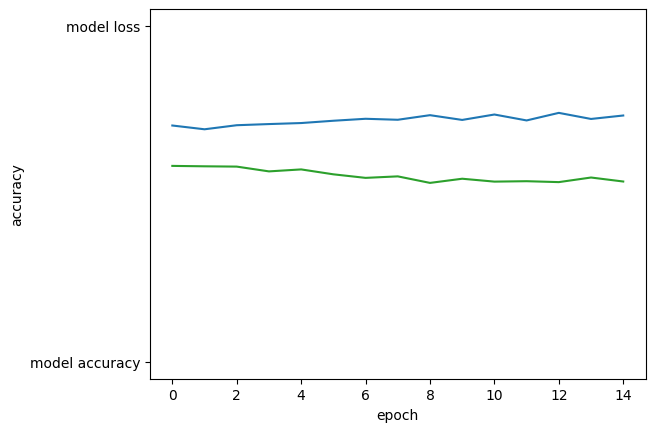

In [ ]:
#list all data in history
print(history.history.keys())

#summarize history for accuracy
mplt.plot(history.history["accuracy"])
mplt.plot("model accuracy")
mplt.ylabel("accuracy")
mplt.xlabel("epoch")


#summarize history for loss
mplt.plot(history.history["loss"])
mplt.plot("model loss")
mplt.ylabel("accuracy")
mplt.xlabel("epoch")
mplt.show()

In [ ]:
import PIL as pil

test_data = []
image_directory = "/content/cat-and-dog/test_set/test_set/cats"

for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
        image_path = os.path.join(image_directory, filename)
        image = pil.Image.open(image_path)
        # Process the image as needed and extract relevant information
        # For example, you can resize the image, extract features, etc.
        image_data = {
            'filename': filename,
            'width': 196,
            'height': 196,
            # Add more attributes or features as desired
        }

        image_array = np.array(image_data)
        print(image_array)
        test_data.append(image_array)



test_data2 = []
image_directory = "/content/cat-and-dog/test_set/test_set/dogs"

for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
        image_path = os.path.join(image_directory, filename)
        image = pil.Image.open(image_path)
        # Process the image as needed and extract relevant information
        # For example, you can resize the image, extract features, etc.
        image_data = {
            'filename': filename,
            'width': 196,
            'height': 196
            # Add more attributes or features as desired
        }
        image_array = np.array(image_data)
        test_data2.append(image_array)

df = pd.DataFrame({"cats":pd.Series(test_data[:50]), "dogs":pd.Series(test_data2[:50])})


In [ ]:
print(df.cats[10].shape)

###images prediction

In [ ]:
predict_dir = "/content/drive/MyDrive/cats_dogs_test"
onlyfiles = [f for f in listdir(predict_dir) if isfile(join(predict_dir, f))]
print(onlyfiles)

['cat.4009.jpg', 'cat.4011.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4007.jpg', 'cat.4002.jpg', 'cat.4010.jpg', 'cat.4006.jpg', 'cat.4012.jpg', 'cat.4001.jpg', 'cat.4008.jpg', 'cat.4003.jpg', 'cat.4013.jpg', 'cat.4014.jpg', 'cat.4035.jpg', 'cat.4030.jpg', 'cat.4018.jpg', 'cat.4026.jpg', 'cat.4033.jpg', 'cat.4020.jpg', 'cat.4016.jpg', 'cat.4031.jpg', 'cat.4034.jpg', 'cat.4029.jpg', 'cat.4027.jpg', 'cat.4017.jpg', 'cat.4022.jpg', 'cat.4024.jpg', 'cat.4028.jpg', 'cat.4015.jpg', 'cat.4032.jpg', 'cat.4023.jpg', 'cat.4021.jpg', 'cat.4019.jpg', 'cat.4025.jpg', 'cat.4058.jpg', 'cat.4059.jpg', 'cat.4052.jpg', 'cat.4038.jpg', 'cat.4044.jpg', 'cat.4043.jpg', 'cat.4042.jpg', 'cat.4057.jpg', 'cat.4055.jpg', 'cat.4054.jpg', 'cat.4053.jpg', 'cat.4040.jpg', 'cat.4048.jpg', 'cat.4049.jpg', 'cat.4036.jpg', 'cat.4051.jpg', 'cat.4046.jpg', 'cat.4060.jpg', 'cat.4050.jpg', 'cat.4056.jpg', 'cat.4045.jpg', 'cat.4039.jpg', 'cat.4047.jpg', 'cat.4041.jpg', 'cat.4037.jpg', 'cat.4069.jpg', 'cat.4073.jpg', 'cat.40

In [ ]:
!pip install keras.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
#predicting images
from keras.utils import load_img, img_to_array
import random

dog_counter = 0
cat_counter = 0

for i in range(20):
  j = random.randint(0,200)
  img = load_img(predict_dir+"/"+onlyfiles[j],
                       target_size=(img_w, img_h)
                       )
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)#This line adds an extra dimension to the array x
  #along the specified axis. In this case, it adds an extra dimension at axis 0, effectively creating a batch of size 1.

  img = np.vstack([x])
  predict = model.predict(img, batch_size=1)
  #classes = model.predict_classes(img, batch_size=10)
  print(onlyfiles[j])

  if predict[0] < 0.5:
    print("Cat\n------------------------------------------------------------------------------------")
    cat_counter =cat_counter + 1
  else:
    print("Dog\n------------------------------------------------------------------------------------")
    dog_counter =dog_counter+ 1





print("Total Dogs:", dog_counter)
print("Total Cat:", cat_counter)

1/1 [==============================] - 0s 143ms/step
dog.4089.jpg
Dog
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 37ms/step
dog.4007.jpg
Dog
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 57ms/step
cat.4010.jpg
Cat
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 31ms/step
dog.4033.jpg
Dog
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 65ms/step
cat.4031.jpg
Dog
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 41ms/step
dog.4011.jpg
Dog
------------------------------------------------------------------------------------
1/1 [==============================] - 0s 33ms/step
cat.4097.jpg
Dog
------